### Q1

查出特定時間內被使用過的 erc20 合約，與使用次數

```bash
SELECT token_address, COUNT(*) FROM `bigquery-public-data.crypto_ethereum.token_transfers` WHERE (TIMESTAMP_TRUNC(block_timestamp, DAY) > TIMESTAMP("2025-11-01") AND TIMESTAMP_TRUNC(block_timestamp, DAY) < TIMESTAMP("2025-12-11")) group by token_address
```

結果中可以看到目前最紅的 coin 是: https://etherscan.io/token/0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
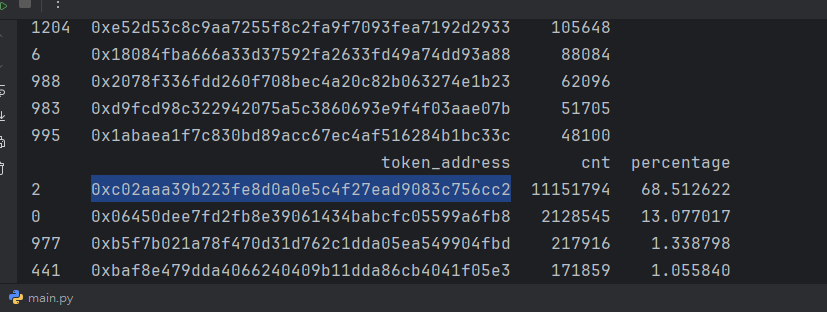

In [ ]:
import pandas as pd

# SELECT token_address, COUNT(*) FROM `bigquery-public-data.crypto_ethereum.token_transfers` WHERE (TIMESTAMP_TRUNC(block_timestamp, DAY) > TIMESTAMP("2025-11-01") AND TIMESTAMP_TRUNC(block_timestamp, DAY) < TIMESTAMP("2025-12-11")) group by token_address

# read data.json
df = pd.read_json('data.json')
df.rename(columns={'f0_': 'cnt'}, inplace=True)
print(df.head())

# sort with cnt col
df.sort_values('cnt', ascending=False, inplace=True)
print(df.head(10))

total_count = df['cnt'].sum()
df['percentage'] = (df['cnt'] / total_count) * 100

print(df.head(10))